# Bank Marketing Project


Problem Statement:

Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).



Attribute Information:-
###Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-
employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or 
widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')

6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

8 - contact: contact communication type (categorical: 'cellular', 'telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target 
(e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Social and economic context attributes

16 - balance

Output variable (desired target):

17 - deposit - has the client subscribed a term deposit? (binary: 'yes', 'no')

Link of the dataset:  https://github.com/dsrscientist/dataset3/blob/main/bank_marketing.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Z:\ML Datasets\Bank.csv')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform) 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,15,1,2,0,0,425,1,0,0,19,0,255,0,0,0,3,0
11158,21,7,1,1,0,1149,0,0,2,15,6,81,3,0,0,3,0
11159,14,9,2,1,0,453,0,0,0,18,1,154,1,0,0,3,0
11160,25,9,1,1,0,424,0,1,0,7,8,7,1,155,5,0,0


# EDA :

In [6]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

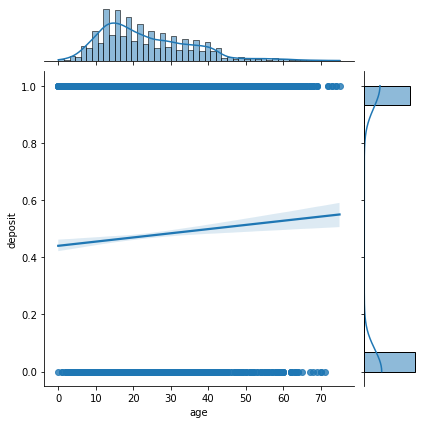

In [7]:
sns.jointplot(data = df, x='age', y='deposit', kind = 'reg')

<AxesSubplot:xlabel='job', ylabel='count'>

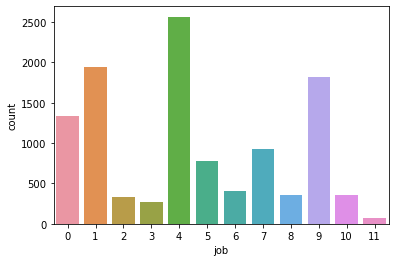

In [8]:
sns.countplot(df['job'])

<AxesSubplot:xlabel='marital', ylabel='count'>

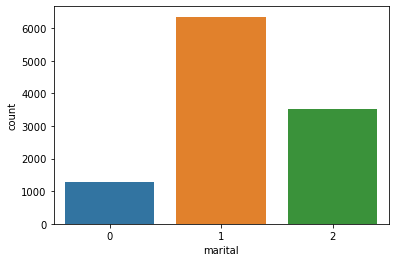

In [9]:
sns.countplot(df['marital'])

<AxesSubplot:xlabel='default', ylabel='count'>

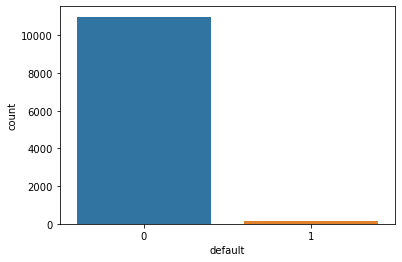

In [10]:
sns.countplot(df['default'])

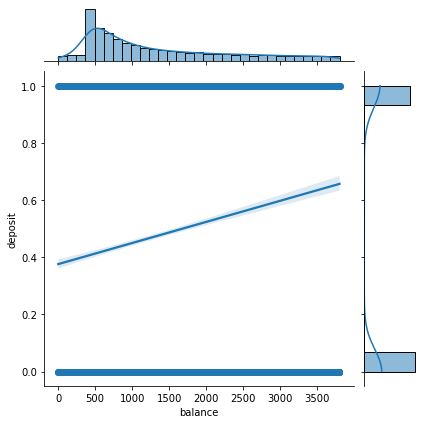

In [11]:
sns.jointplot(data = df, x='balance', y='deposit', kind = 'reg')

<AxesSubplot:xlabel='housing', ylabel='count'>

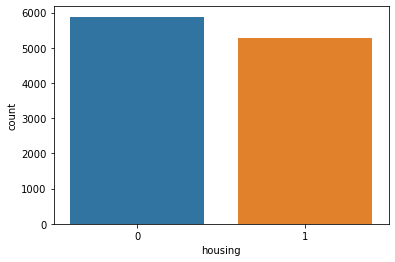

In [12]:
sns.countplot(df['housing'])

<AxesSubplot:xlabel='loan', ylabel='count'>

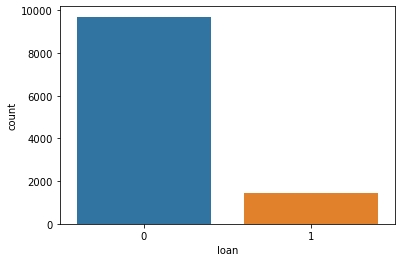

In [13]:
sns.countplot(df['loan'])

<AxesSubplot:xlabel='contact', ylabel='count'>

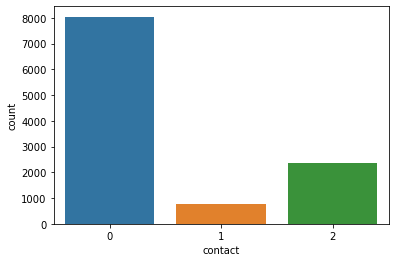

In [14]:
sns.countplot(df['contact'])

<AxesSubplot:xlabel='day', ylabel='count'>

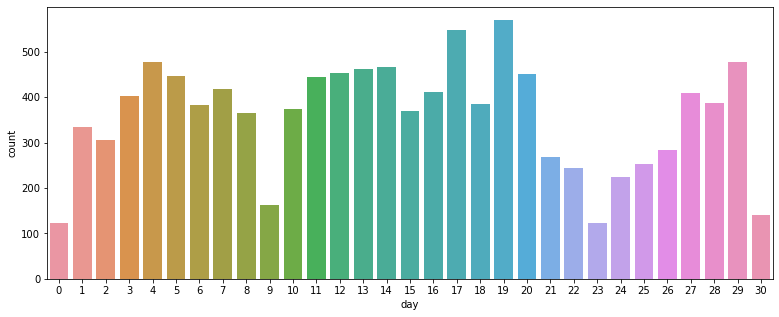

In [15]:
plt.figure(figsize=(13,5))
sns.countplot(df['day'])

<AxesSubplot:xlabel='month', ylabel='count'>

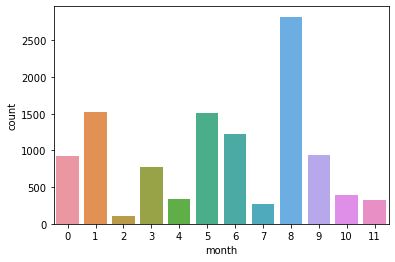

In [16]:
sns.countplot(df['month'])

<AxesSubplot:xlabel='duration', ylabel='deposit'>

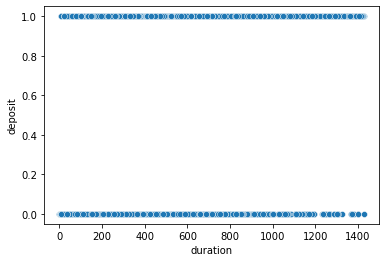

In [17]:
sns.scatterplot(data = df, x = 'duration', y ='deposit')

<AxesSubplot:xlabel='campaign', ylabel='count'>

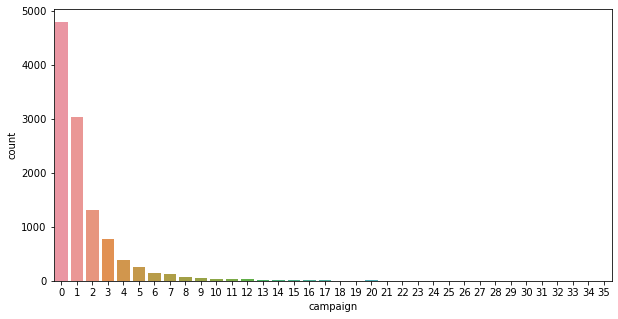

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(df['campaign'])

<AxesSubplot:xlabel='pdays', ylabel='deposit'>

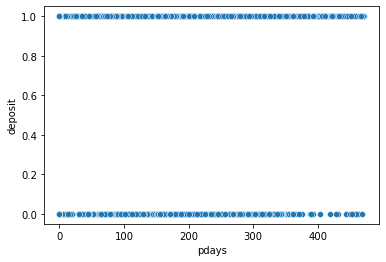

In [19]:
sns.scatterplot(data = df, x = 'pdays', y ='deposit')

<AxesSubplot:xlabel='previous', ylabel='count'>

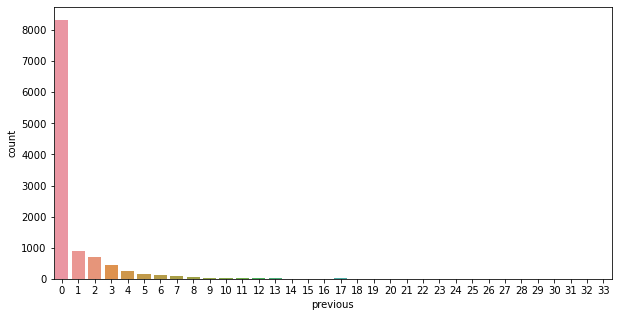

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(df['previous'])


<AxesSubplot:xlabel='poutcome', ylabel='count'>

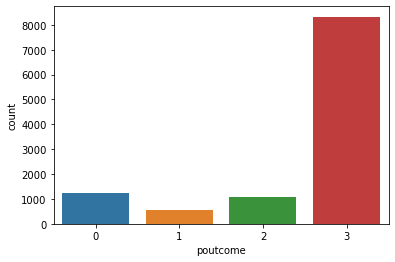

In [21]:
sns.countplot(df['poutcome'])

# Correlation 

In [22]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,1.000000,-0.031616,-0.442829,-0.126086,-0.011421,0.138945,-0.168690,-0.031407,0.027776,-0.000782,-0.026105,0.000049,-0.005842,0.002171,0.022643,-0.002701,0.034860
job,-0.031616,1.000000,0.078314,0.147046,-0.007066,0.041978,-0.136965,-0.067092,-0.087915,0.026589,-0.076011,0.004349,0.004164,-0.005552,0.012983,-0.004238,0.063395
marital,-0.442829,0.078314,1.000000,0.125845,-0.014691,0.002412,-0.036345,-0.062029,-0.060456,-0.003642,-0.004070,0.008605,-0.031068,0.031396,0.032948,-0.039424,0.067610
education,-0.126086,0.147046,0.125845,1.000000,-0.010709,0.068981,-0.109168,-0.073154,-0.132540,0.016759,-0.055868,-0.016569,-0.007665,0.021436,0.026279,-0.040262,0.095948
default,-0.011421,-0.007066,-0.014691,-0.010709,1.000000,-0.111444,0.011076,0.076434,0.035709,0.017342,0.000950,-0.007812,0.032001,-0.035981,-0.037036,0.042357,-0.040680
balance,0.138945,0.041978,0.002412,0.068981,-0.111444,1.000000,-0.101124,-0.129000,-0.045555,0.008581,0.025419,0.041957,-0.039625,0.034184,0.062488,-0.055544,0.142630
housing,-0.168690,-0.136965,-0.036345,-0.109168,0.011076,-0.101124,1.000000,0.076761,0.226392,-0.014770,0.219602,0.033603,0.005053,0.071124,-0.003586,-0.046370,-0.203888
loan,-0.031407,-0.067092,-0.062029,-0.073154,0.076434,-0.129000,0.076761,1.000000,0.006829,0.017269,0.025329,-0.006501,0.035491,-0.029056,-0.027478,0.026344,-0.110580
contact,0.027776,-0.087915,-0.060456,-0.132540,0.035709,-0.045555,0.226392,0.006829,1.000000,0.007943,0.289803,-0.028783,0.058695,-0.231663,-0.179922,0.257993,-0.249847
day,-0.000782,0.026589,-0.003642,0.016759,0.017342,0.008581,-0.014770,0.017269,0.007943,1.000000,-0.019840,-0.022901,0.139886,-0.079644,-0.060488,0.080221,-0.056326


In [23]:
df.corr().sum()

age          0.378964
job          0.962362
marital      0.652576
education    0.930274
default      0.939029
balance      1.085284
housing      0.822705
loan         0.728159
contact      0.894461
day          1.056195
month        1.249562
duration     1.418958
campaign     0.868724
pdays        0.542251
previous     0.892315
poutcome    -0.184272
deposit      1.227124
dtype: float64

<AxesSubplot:>

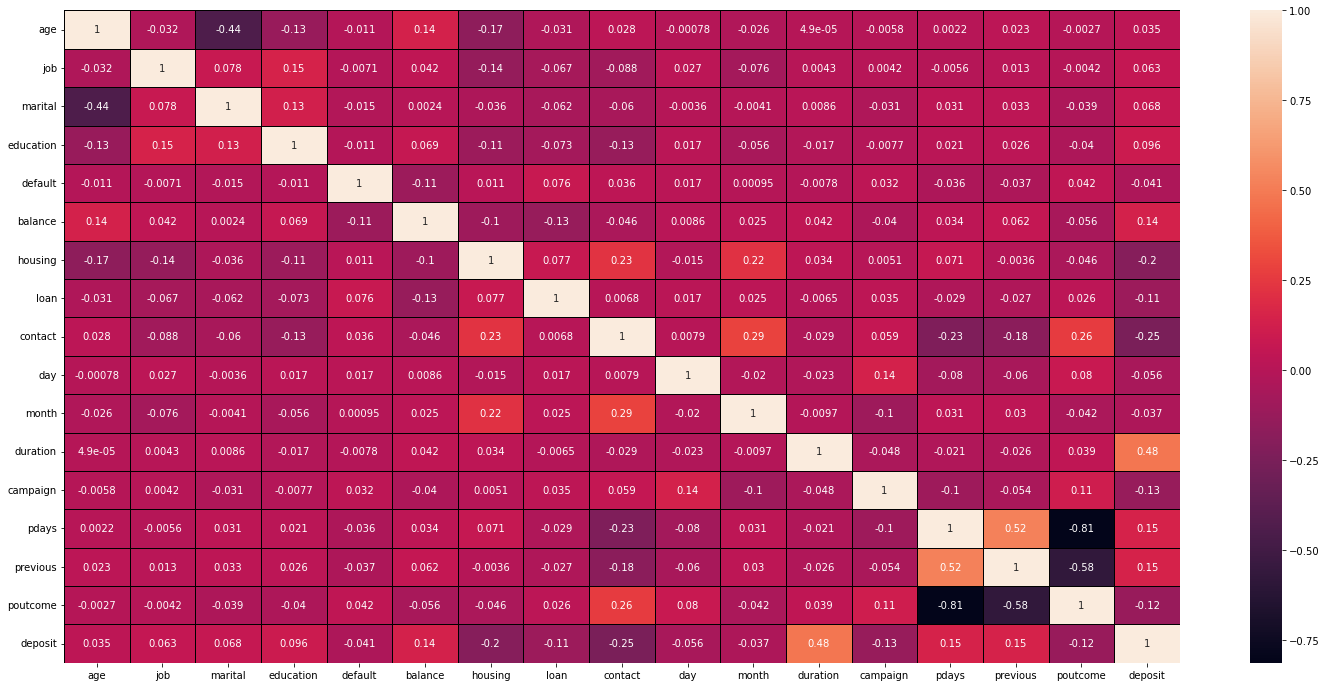

In [24]:
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, linecolor = 'black')

age             AxesSubplot(0.125,0.657941;0.110714x0.222059)
job          AxesSubplot(0.257857,0.657941;0.110714x0.222059)
marital      AxesSubplot(0.390714,0.657941;0.110714x0.222059)
education    AxesSubplot(0.523571,0.657941;0.110714x0.222059)
default      AxesSubplot(0.656429,0.657941;0.110714x0.222059)
balance      AxesSubplot(0.789286,0.657941;0.110714x0.222059)
housing         AxesSubplot(0.125,0.391471;0.110714x0.222059)
loan         AxesSubplot(0.257857,0.391471;0.110714x0.222059)
contact      AxesSubplot(0.390714,0.391471;0.110714x0.222059)
day          AxesSubplot(0.523571,0.391471;0.110714x0.222059)
month        AxesSubplot(0.656429,0.391471;0.110714x0.222059)
duration     AxesSubplot(0.789286,0.391471;0.110714x0.222059)
campaign           AxesSubplot(0.125,0.125;0.110714x0.222059)
pdays           AxesSubplot(0.257857,0.125;0.110714x0.222059)
previous        AxesSubplot(0.390714,0.125;0.110714x0.222059)
poutcome        AxesSubplot(0.523571,0.125;0.110714x0.222059)
deposit 

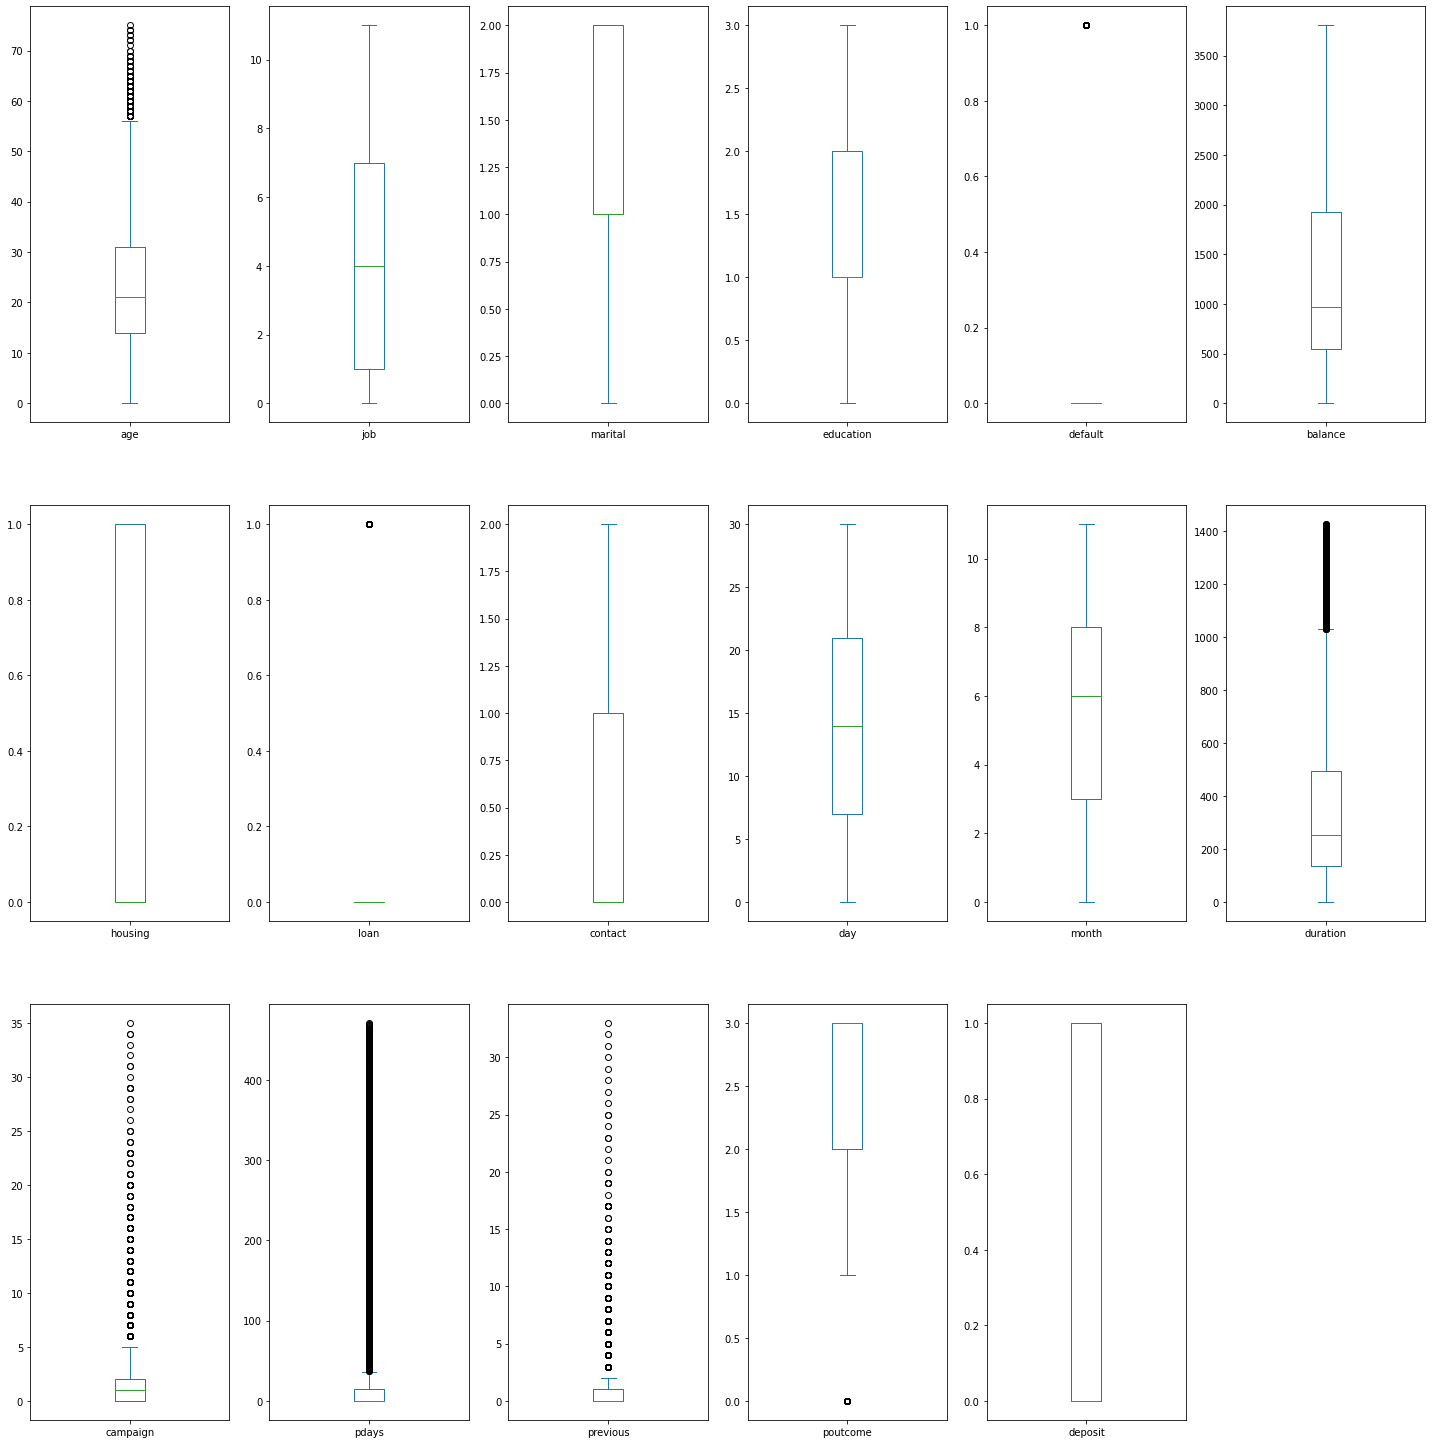

In [25]:
df.plot(kind = 'box', subplots = True, layout = (3,6) ,figsize=(25,20))

In [26]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z.shape

(11162, 17)

In [27]:
print(np.where(z<3))

(array([    0,     0,     0, ..., 11161, 11161, 11161], dtype=int64), array([ 0,  1,  2, ..., 14, 15, 16], dtype=int64))


In [28]:
df1 = df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(11162, 17)
(9997, 17)


In [29]:
loss = (((11162 - 9997)/11162)*100)
loss

10.437197634832469

# Skewness

In [30]:
df1.skew()

age          0.633843
job          0.188222
marital     -0.174525
education    0.098559
default      0.000000
balance      0.926409
housing      0.115243
loan         2.201527
contact      1.168305
day          0.116817
month       -0.335334
duration     1.268803
campaign     1.976792
pdays        2.252346
previous     2.687171
poutcome    -1.954361
deposit      0.157153
dtype: float64

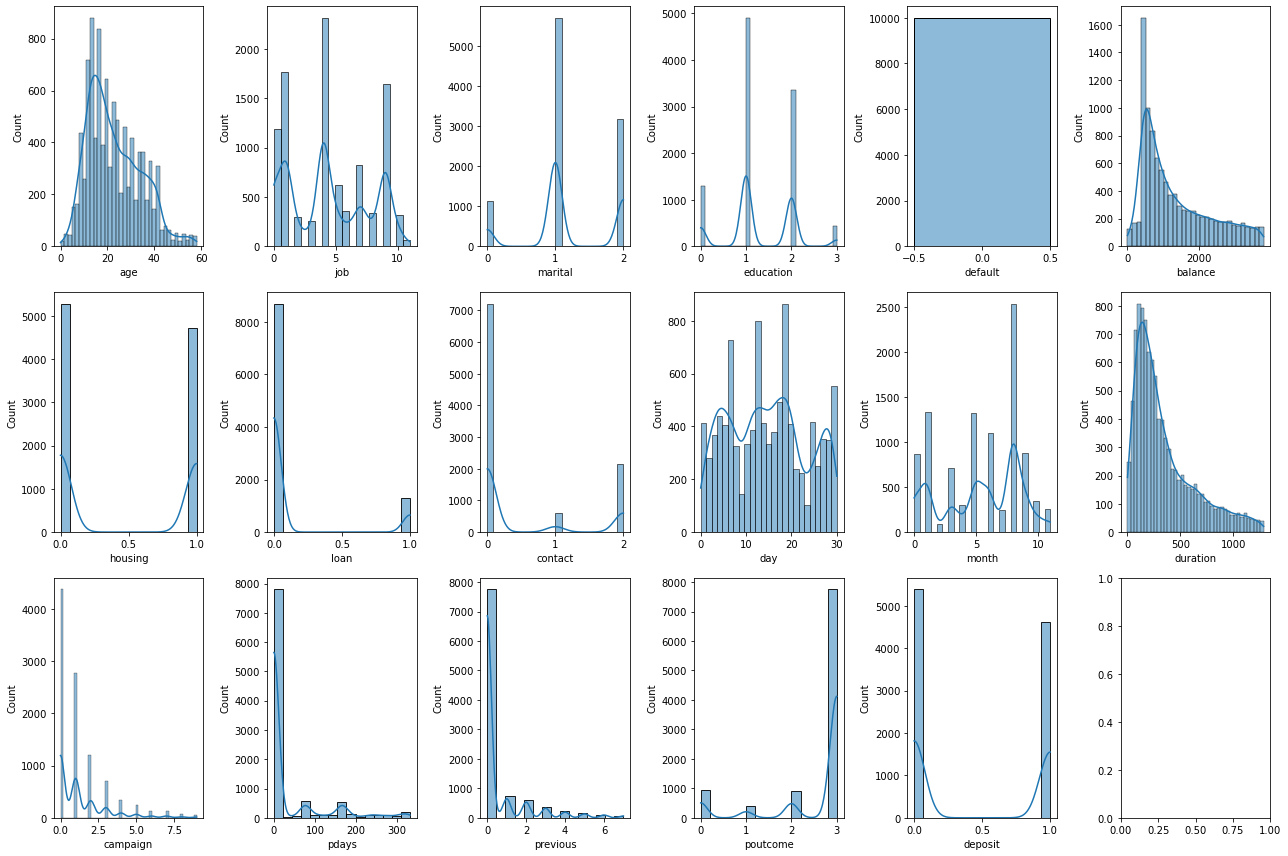

In [31]:
fig, ax = plt.subplots(ncols = 6, nrows=3, figsize = (18,12))
index=0
ax = ax.flatten()

for col, value in df.items():
    if col!= 'type':
        sns.histplot(data = df1, x = col, ax= ax[index], kde = True)
        index +=1
plt.tight_layout()

In [32]:
df1.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,9997.000000,9997.000000,9997.000000,9997.000000,9997.0,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,22.787036,4.483245,1.203561,1.292888,0.0,1336.248775,0.471241,0.129939,0.494548,14.586276,5.436131,347.474342,1.247474,35.242773,0.579374,2.546764,0.460838
std,11.245352,3.234444,0.623563,0.743279,0.0,964.815271,0.499197,0.336253,0.826540,8.429027,3.191445,287.619294,1.697388,76.644689,1.328658,0.946835,0.498489
min,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,1.000000,1.000000,1.000000,0.0,554.000000,0.000000,0.000000,0.000000,7.000000,3.000000,136.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,20.000000,4.000000,1.000000,1.000000,0.0,981.000000,0.000000,0.000000,0.000000,14.000000,6.000000,250.000000,1.000000,0.000000,0.000000,3.000000,0.000000
75%,31.000000,7.000000,2.000000,2.000000,0.0,1945.000000,1.000000,0.000000,1.000000,20.000000,8.000000,478.000000,2.000000,0.000000,0.000000,3.000000,1.000000
max,58.000000,11.000000,2.000000,3.000000,0.0,3803.000000,1.000000,1.000000,2.000000,30.000000,11.000000,1285.000000,9.000000,331.000000,7.000000,3.000000,1.000000


In [33]:
X = df1.drop(['deposit'], axis = 1)
Y = df1['deposit']

In [34]:
from sklearn.preprocessing import power_transform
X = power_transform(X, method = 'yeo-johnson')
X

array([[ 1.47182461, -1.6213085 , -0.34832613, ..., -0.53725585,
        -0.53722984,  0.53061426],
       [ 1.282552  , -1.6213085 , -0.34832613, ..., -0.53725585,
        -0.53722984,  0.53061426],
       [ 0.16702784,  1.27344038, -0.34832613, ..., -0.53725585,
        -0.53722984,  0.53061426],
       ...,
       [-0.73218203,  1.27344038,  1.29658941, ..., -0.53725585,
        -0.53722984,  0.53061426],
       [ 0.33695681,  1.27344038, -0.34832613, ...,  1.87650326,
         1.95240087, -2.14333797],
       [-0.50830676,  1.27344038, -0.34832613, ..., -0.53725585,
        -0.53722984,  0.53061426]])

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.47182461, -1.6213085 , -0.34832613, ..., -0.53725585,
        -0.53722984,  0.53061426],
       [ 1.282552  , -1.6213085 , -0.34832613, ..., -0.53725585,
        -0.53722984,  0.53061426],
       [ 0.16702784,  1.27344038, -0.34832613, ..., -0.53725585,
        -0.53722984,  0.53061426],
       ...,
       [-0.73218203,  1.27344038,  1.29658941, ..., -0.53725585,
        -0.53722984,  0.53061426],
       [ 0.33695681,  1.27344038, -0.34832613, ...,  1.87650326,
         1.95240087, -2.14333797],
       [-0.50830676,  1.27344038, -0.34832613, ..., -0.53725585,
        -0.53722984,  0.53061426]])

In [36]:
df2 = pd.DataFrame(df1)

# Train Test Split 

In [37]:
df['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [41]:
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(lr, X, Y, cv=10).mean()

[[877 174]
 [232 717]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1051
           1       0.80      0.76      0.78       949

    accuracy                           0.80      2000
   macro avg       0.80      0.79      0.80      2000
weighted avg       0.80      0.80      0.80      2000

0.797


0.7777379189594796

In [42]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)

In [44]:
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(lr, X, Y, cv=10)
cvs.mean()

[[897 154]
 [152 797]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1051
           1       0.84      0.84      0.84       949

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

0.847


0.7874408408408409

In [45]:
#DescisonTree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
pred = dt.predict(X_test)

In [47]:
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(lr, X, Y, cv=10)
cvs.mean()

[[861 190]
 [248 701]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1051
           1       0.79      0.74      0.76       949

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000

0.781


0.7874408408408409

In [48]:
#SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
pred = svc.predict(X_test)

In [49]:
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(lr, X, Y, cv=10)
cvs.mean()

[[851 200]
 [170 779]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1051
           1       0.80      0.82      0.81       949

    accuracy                           0.81      2000
   macro avg       0.81      0.82      0.81      2000
weighted avg       0.82      0.81      0.82      2000

0.815


0.7874408408408409

In [50]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

In [54]:
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(lr, X, Y, cv=10)
cvs.mean()

[[846 205]
 [256 693]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1051
           1       0.77      0.73      0.75       949

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000

0.7695


0.7874408408408409

# Hyperparameter Tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
max_depth = range(1, 9900, 300)
min_samples_split = range(1, 9900, 300)
min_samples_leaf = range(1, 9900, 300)
max_features = ['auto', 'sqrt', 'log2']

random_grid = {'criterion' : criterion,
               'splitter' : splitter,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'max_features' : max_features}

random_grid

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': range(1, 9900, 300),
 'min_samples_split': range(1, 9900, 300),
 'min_samples_leaf': range(1, 9900, 300),
 'max_features': ['auto', 'sqrt', 'log2']}

In [58]:
dt = DecisionTreeClassifier()
rscv = RandomizedSearchCV(estimator = dt,
                         param_distributions = random_grid,
                         cv = 10,
                         random_state = 25,
                         verbose = 2,
                         n_jobs = -1)

rscv.fit(X_train, Y_train)
rscv

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(1, 9900, 300),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(1, 9900, 300),
                                        'min_samples_split': range(1, 9900, 300),
                                        'splitter': ['best', 'random']},
                   random_state=25, verbose=2)

In [60]:
rscv.best_params_

{'splitter': 'best',
 'min_samples_split': 2701,
 'min_samples_leaf': 301,
 'max_features': 'auto',
 'max_depth': 301,
 'criterion': 'gini'}

In [63]:
rscv.best_estimator_

DecisionTreeClassifier(max_depth=301, max_features='auto', min_samples_leaf=301,
                       min_samples_split=2701)

In [69]:
pred_rscv = best_rscv.predict(X_test)
best_rscv = rscv.best_estimator_

print(confusion_matrix(Y_test, pred_rscv))
print(classification_report(Y_test, pred_rscv))
print(accuracy_score(Y_test, pred_rscv))
cvs = cross_val_score(rscv, X, Y, cv=10)
cvs.mean()

[[786 265]
 [262 687]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1051
           1       0.72      0.72      0.72       949

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000

0.7365


0.7874408408408409

In [70]:
import pickle
#filename = 'Bank Marketing Project.pkl'
#pickle.dump(dt, open(filename, 'wb'))